# Расчет убыточных рейсов из Анапы


In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn' Этот параметр выставил, т.к. при присвоении новому столбцу значений выскакивало предупреждение
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('flights_from_anapa.csv')

## Проверяем данные в датасете

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   flight_id            127 non-null    int64  
 1   flight_no            127 non-null    object 
 2   scheduled_departure  127 non-null    object 
 3   actual_departure     127 non-null    object 
 4   departure_city       127 non-null    object 
 5   arrival_airport      127 non-null    object 
 6   arrival_city         127 non-null    object 
 7   duration_in_minutes  127 non-null    float64
 8   aircraft_code        127 non-null    object 
 9   aircraft_model       127 non-null    object 
 10  fuel_on_minute       127 non-null    int64  
 11  fuel_cost            127 non-null    float64
 12  aircraft_seats       127 non-null    int64  
 13  occupied_seats       118 non-null    float64
 14  revenue              118 non-null    float64
 15  tickets_count        118 non-null    flo

In [4]:
df.sample(5)

,flight_id,flight_no,scheduled_departure,actual_departure,departure_city,arrival_airport,arrival_city,duration_in_minutes,aircraft_code,aircraft_model,fuel_on_minute,fuel_cost,aircraft_seats,occupied_seats,revenue,tickets_count
28,136282,PG0252,2017-01-16T10:05:00Z,2017-01-16T10:07:00Z,Anapa,SVO,Moscow,101.0,733,Boeing 737-300,40,56.363,130,106.0,1518800.0,106.0
88,136709,PG0480,2017-01-15T09:25:00Z,2017-01-15T09:28:00Z,Anapa,EGO,Belgorod,50.0,SU9,Sukhoi Superjet-100,28,56.363,97,87.0,689700.0,87.0
82,136661,PG0480,2017-01-01T09:25:00Z,2017-01-01T09:27:00Z,Anapa,EGO,Belgorod,50.0,SU9,Sukhoi Superjet-100,28,56.363,97,96.0,759000.0,96.0
85,136672,PG0480,2017-02-03T09:25:00Z,2017-02-03T09:28:00Z,Anapa,EGO,Belgorod,50.0,SU9,Sukhoi Superjet-100,28,56.363,97,96.0,759000.0,96.0
20,136249,PG0252,2017-02-14T10:05:00Z,2017-02-14T10:08:00Z,Anapa,SVO,Moscow,98.0,733,Boeing 737-300,40,56.363,130,123.0,1800600.0,123.0


In [5]:
df[pd.isna(df.revenue)]

,flight_id,flight_no,scheduled_departure,actual_departure,departure_city,arrival_airport,arrival_city,duration_in_minutes,aircraft_code,aircraft_model,fuel_on_minute,fuel_cost,aircraft_seats,occupied_seats,revenue,tickets_count
59,136511,PG0194,2017-02-21T06:10:00Z,2017-02-21T06:15:00Z,Anapa,NOZ,Novokuznetsk,310.0,733,Boeing 737-300,40,56.363,130,NaN,NaN,NaN
60,136513,PG0194,2017-02-28T06:10:00Z,2017-02-28T06:13:00Z,Anapa,NOZ,Novokuznetsk,310.0,733,Boeing 737-300,40,56.363,130,NaN,NaN,NaN
61,136514,PG0194,2017-02-07T06:10:00Z,2017-02-07T06:14:00Z,Anapa,NOZ,Novokuznetsk,299.0,733,Boeing 737-300,40,56.363,130,NaN,NaN,NaN
62,136523,PG0194,2017-01-10T06:10:00Z,2017-01-10T06:14:00Z,Anapa,NOZ,Novokuznetsk,312.0,733,Boeing 737-300,40,56.363,130,NaN,NaN,NaN
63,136540,PG0194,2017-01-17T06:10:00Z,2017-01-17T06:14:00Z,Anapa,NOZ,Novokuznetsk,307.0,733,Boeing 737-300,40,56.363,130,NaN,NaN,NaN
64,136544,PG0194,2017-01-31T06:10:00Z,2017-01-31T06:10:00Z,Anapa,NOZ,Novokuznetsk,304.0,733,Boeing 737-300,40,56.363,130,NaN,NaN,NaN
65,136546,PG0194,2017-01-03T06:10:00Z,2017-01-03T06:13:00Z,Anapa,NOZ,Novokuznetsk,302.0,733,Boeing 737-300,40,56.363,130,NaN,NaN,NaN
66,136560,PG0194,2017-01-24T06:10:00Z,2017-01-24T06:13:00Z,Anapa,NOZ,Novokuznetsk,305.0,733,Boeing 737-300,40,56.363,130,NaN,NaN,NaN
67,136567,PG0194,2017-02-14T06:10:00Z,2017-02-14T06:12:00Z,Anapa,NOZ,Novokuznetsk,311.0,733,Boeing 737-300,40,56.363,130,NaN,NaN,NaN


В датасете 127 записей. Из них в 118 записях есть значения во всех полях, включая поле REVENUE (доход).
В 9 записях полетов в Новокузнецк эти поля пустые. Поэтому полеты в Новокузнецк нельзя проверить на прибыльность.
Удаляем из датасета записи с полетами в Новокузнецк.

In [6]:
df=df[pd.isna(df.revenue) == False]

In [7]:
# Рассчитываем затраты и прибыльность (отношение дохода к затратам, в долях)
df['expences']= df.duration_in_minutes * df.fuel_on_minute * df.fuel_cost
df['profit']= df.revenue / df.expences
df['profit_delta']= df.revenue - df.expences

# Рассчитываем наполняемость рейса в процентах
df['occupation']=df.occupied_seats / df.aircraft_seats * 100

In [8]:
df.head(5)

,flight_id,flight_no,scheduled_departure,actual_departure,departure_city,arrival_airport,arrival_city,duration_in_minutes,aircraft_code,aircraft_model,fuel_on_minute,fuel_cost,aircraft_seats,occupied_seats,revenue,tickets_count,expences,profit,profit_delta,occupation
0,136119,PG0252,2017-01-03T10:05:00Z,2017-01-03T10:08:00Z,Anapa,SVO,Moscow,101.0,733,Boeing 737-300,40,56.363,130,113.0,1653000.0,113.0,227706.52,7.259344,1425293.48,86.923077
1,136120,PG0252,2017-02-24T10:05:00Z,2017-02-24T10:07:00Z,Anapa,SVO,Moscow,99.0,733,Boeing 737-300,40,56.363,130,109.0,1605400.0,109.0,223197.48,7.192734,1382202.52,83.846154
2,136122,PG0252,2017-01-08T10:05:00Z,2017-01-08T10:08:00Z,Anapa,SVO,Moscow,100.0,733,Boeing 737-300,40,56.363,130,97.0,1431000.0,97.0,225452.00,6.347249,1205548.00,74.615385
3,136130,PG0252,2017-02-13T10:05:00Z,2017-02-13T10:07:00Z,Anapa,SVO,Moscow,99.0,733,Boeing 737-300,40,56.363,130,107.0,1556600.0,107.0,223197.48,6.974093,1333402.52,82.307692
4,136131,PG0252,2017-01-28T10:05:00Z,2017-01-28T10:07:00Z,Anapa,SVO,Moscow,99.0,733,Boeing 737-300,40,56.363,130,124.0,1812800.0,124.0,223197.48,8.121955,1589602.52,95.384615


In [9]:
# выведем рейсы, наполняемость которых меньше 75%
df[df['occupation']<75]

,flight_id,flight_no,scheduled_departure,actual_departure,departure_city,arrival_airport,arrival_city,duration_in_minutes,aircraft_code,aircraft_model,fuel_on_minute,fuel_cost,aircraft_seats,occupied_seats,revenue,tickets_count,expences,profit,profit_delta,occupation
2,136122,PG0252,2017-01-08T10:05:00Z,2017-01-08T10:08:00Z,Anapa,SVO,Moscow,100.0,733,Boeing 737-300,40,56.363,130,97.0,1431000.0,97.0,225452.000,6.347249,1205548.000,74.615385
38,136360,PG0252,2017-02-05T10:05:00Z,2017-02-05T10:08:00Z,Anapa,SVO,Moscow,100.0,733,Boeing 737-300,40,56.363,130,97.0,1455400.0,97.0,225452.000,6.455476,1229948.000,74.615385
77,136642,PG0480,2017-01-30T09:25:00Z,2017-01-30T09:28:00Z,Anapa,EGO,Belgorod,49.0,SU9,Sukhoi Superjet-100,28,56.363,97,64.0,531000.0,64.0,77330.036,6.866672,453669.964,65.979381
102,136807,PG0480,2017-02-23T09:25:00Z,2017-02-23T09:28:00Z,Anapa,EGO,Belgorod,50.0,SU9,Sukhoi Superjet-100,28,56.363,97,68.0,531000.0,68.0,78908.200,6.729339,452091.800,70.103093


Text(0.5, 1.0, 'Распределение самолетов по прибыльности')

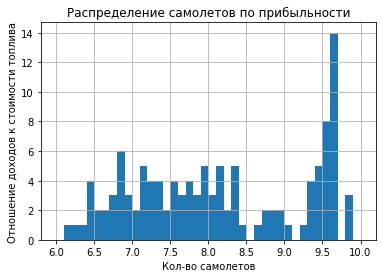

In [10]:
# выведем прибыльность рейсов на диаграмму
df.profit.hist(bins=40, range=(6, 10), label="Количество самолетов")
plt.xlabel('Кол-во самолетов')
plt.ylabel('Отношение доходов к стоимости топлива')
plt.title('Распределение самолетов по прибыльности')

График ничего не показывает, что помогло бы выбрать убыточные рейсы.

Text(0.5, 1.0, 'Распределение самолетов по дельте доходов и расходов')

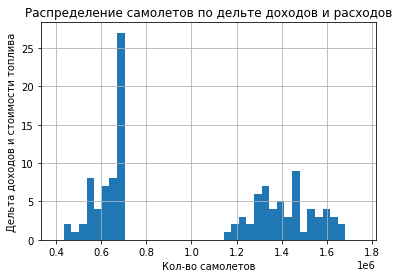

In [11]:
# выведем дельту доходов и расходов на диаграмму
df.profit_delta.hist(bins=40, range=(400000, 1750000), label="Количество самолетов")
plt.xlabel('Кол-во самолетов')
plt.ylabel('Дельта доходов и стоимости топлива')
plt.title('Распределение самолетов по дельте доходов и расходов')

Этот график тоже не позволяет выбрать малоприбыльные рейсы. Но показывает разделение рейсов на две группы по дельте доходов и расходов.

Графики ничего не показывают, что помогло бы выбрать убыточные рейсы.
Поэтому просто выберем рейсы, у которых самая маленькая прибыльность.

In [12]:
# выведем 5 рейсов, прибыльность которых наименьшая
df.sort_values('profit').head(5).sort_values('flight_id')

,flight_id,flight_no,scheduled_departure,actual_departure,departure_city,arrival_airport,arrival_city,duration_in_minutes,aircraft_code,aircraft_model,fuel_on_minute,fuel_cost,aircraft_seats,occupied_seats,revenue,tickets_count,expences,profit,profit_delta,occupation
2,136122,PG0252,2017-01-08T10:05:00Z,2017-01-08T10:08:00Z,Anapa,SVO,Moscow,100.0,733,Boeing 737-300,40,56.363,130,97.0,1431000.0,97.0,225452.00,6.347249,1205548.00,74.615385
12,136178,PG0252,2017-01-29T10:05:00Z,2017-01-29T10:10:00Z,Anapa,SVO,Moscow,99.0,733,Boeing 737-300,40,56.363,130,99.0,1434600.0,99.0,223197.48,6.427492,1211402.52,76.153846
21,136250,PG0252,2017-02-08T10:05:00Z,2017-02-08T10:06:00Z,Anapa,SVO,Moscow,101.0,733,Boeing 737-300,40,56.363,130,99.0,1407800.0,99.0,227706.52,6.182519,1180093.48,76.153846
38,136360,PG0252,2017-02-05T10:05:00Z,2017-02-05T10:08:00Z,Anapa,SVO,Moscow,100.0,733,Boeing 737-300,40,56.363,130,97.0,1455400.0,97.0,225452.00,6.455476,1229948.00,74.615385
54,136464,PG0252,2017-01-09T10:05:00Z,2017-01-09T10:07:00Z,Anapa,SVO,Moscow,100.0,733,Boeing 737-300,40,56.363,130,100.0,1398000.0,100.0,225452.00,6.200876,1172548.00,76.923077


#### Итак, мы можем выделить самые убыточные рейсы по двум критериям:
#### 1) Наполняемость рейса пассажирами
#### 2) "Прибыльность" - отношение дохода от рейса к затратам на топливо 

#### По наполняемости мы отобрали выше 4 рейса, наполняемость которых была ниже 75%. Идентификаторы рейсов: 136122, 136360, 136642, 136642
#### По "прибыльности" - мы отобрали 5 рейсов, прибыльность которых была наименьшей. Идентификаторы рейсов: 136122, 136178, 136250, 136360, 136464
#### Рейс 136122 одновременно оказался убыточным по двум критериям.